In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import panel as pn
plt.style.use('ggplot')
import os
import tarfile
from six.moves import urllib
pn.extension('tabulator')
import lightgbm as lgbm

import hvplot.pandas

%matplotlib inline

In [50]:
df = pd.read_csv("tic-tac-toe-endgame.csv")
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [51]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'], dtype='object')

In [52]:
df.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
dtype: int64

In [53]:
df.value_counts()

V1  V2  V3  V4  V5  V6  V7  V8  V9  V10     
b   b   b   b   o   o   x   x   x   positive    1
x   b   x   x   o   o   x   b   o   positive    1
            o   o   x   b   o   x   positive    1
                        o   b   x   positive    1
                x   b   o   o   x   positive    1
                                               ..
o   o   o   b   x   x   x   o   x   negative    1
                            x   o   negative    1
            o   x   x   b   x   x   negative    1
                        x   b   x   negative    1
x   x   x   x   o   o   x   o   o   positive    1
Length: 958, dtype: int64

In [54]:
for i in df.columns:
  print(df[i].value_counts())
  print()

x    418
o    335
b    205
Name: V1, dtype: int64

x    378
o    330
b    250
Name: V2, dtype: int64

x    418
o    335
b    205
Name: V3, dtype: int64

x    378
o    330
b    250
Name: V4, dtype: int64

x    458
o    340
b    160
Name: V5, dtype: int64

x    378
o    330
b    250
Name: V6, dtype: int64

x    418
o    335
b    205
Name: V7, dtype: int64

x    378
o    330
b    250
Name: V8, dtype: int64

x    418
o    335
b    205
Name: V9, dtype: int64

positive    626
negative    332
Name: V10, dtype: int64



In [55]:
print(df.columns)
df.describe()

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10'], dtype='object')


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,958,958,958,958,958,958,958,958,958,958
unique,3,3,3,3,3,3,3,3,3,2
top,x,x,x,x,x,x,x,x,x,positive
freq,418,378,418,378,458,378,418,378,418,626


# Data Visualisation 

array([<AxesSubplot: title={'center': 'negative'}>,
       <AxesSubplot: title={'center': 'positive'}>], dtype=object)

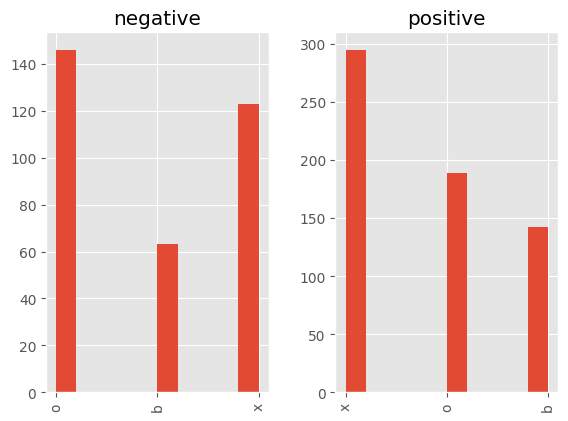

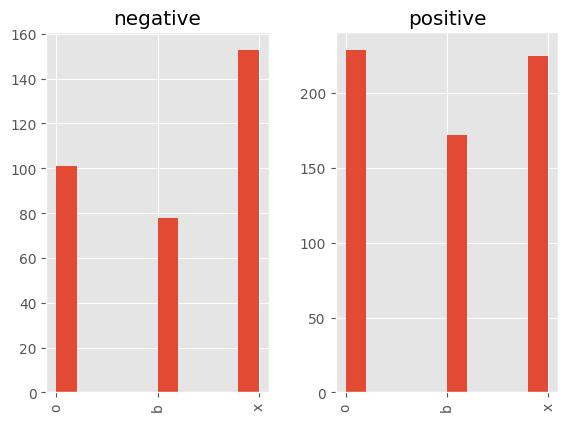

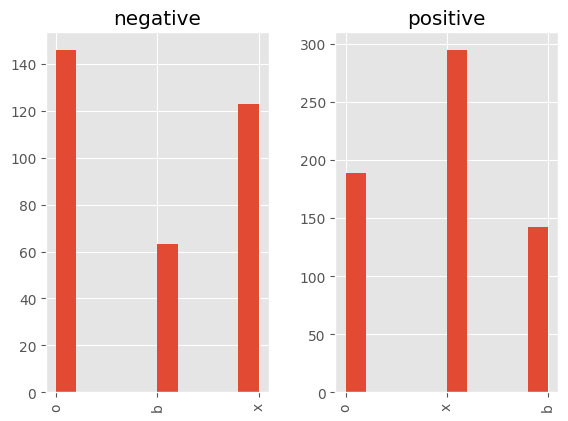

In [56]:
df.V3.hist(by=df.V10)
df.V6.hist(by=df.V10)
df.V9.hist(by=df.V10)


<AxesSubplot: >

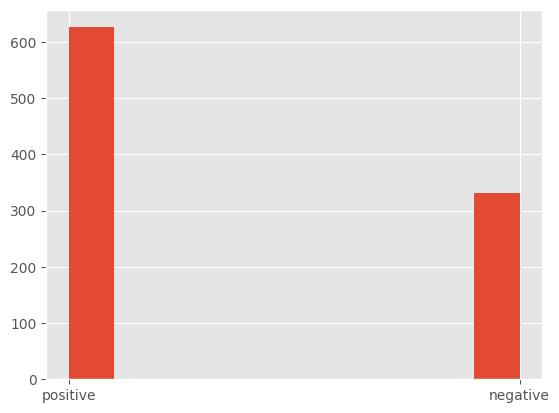

In [57]:
df.V10.hist()

# To convert categorical data to numeric data

In [58]:
x_num = pd.get_dummies(df[['V1','V2','V3','V4','V5','V6','V7','V8','V9']],drop_first = True)


In [59]:
df.replace('negative',0,inplace=True)
df.replace('positive',1,inplace=True)


In [60]:
# Setting the target variable

y = df.iloc[:,9].values


In [61]:
x_num.columns

Index(['V1_o', 'V1_x', 'V2_o', 'V2_x', 'V3_o', 'V3_x', 'V4_o', 'V4_x', 'V5_o',
       'V5_x', 'V6_o', 'V6_x', 'V7_o', 'V7_x', 'V8_o', 'V8_x', 'V9_o', 'V9_x'],
      dtype='object')

# Splitting The Dataset

In [62]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_num,y,test_size = 0.33, random_state = 42)


In [63]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

# Fitting decision tree to training dataset

In [64]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state =  42)
classifier.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

# Predicting the values

In [65]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

#  Confusion Matrix 

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 95,   7],
       [  9, 206]])

# Incorrect Predictions

In [67]:
incorrect_pred = (y_test != y_pred).sum()
incorrect_pred

16

# Accuracy Score

In [68]:
from sklearn import metrics
from sklearn.metrics import classification_report
metrics.accuracy_score(y_test,y_pred)

0.9495268138801262

# Classification Report

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       102
           1       0.97      0.96      0.96       215

    accuracy                           0.95       317
   macro avg       0.94      0.94      0.94       317
weighted avg       0.95      0.95      0.95       317



In [70]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average="macro"))
print("Recall:",metrics.recall_score(y_test, y_pred,average="macro"))
print("F1-Score:",metrics.f1_score(y_test, y_pred,average="macro"))


Accuracy: 0.9495268138801262
Precision: 0.9402988443481402
Recall: 0.9447560419516644
F1-Score: 0.9424734597586426


In [71]:
count_misclassified = (y_pred!=y_test).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 16


# Visualizing the Tree

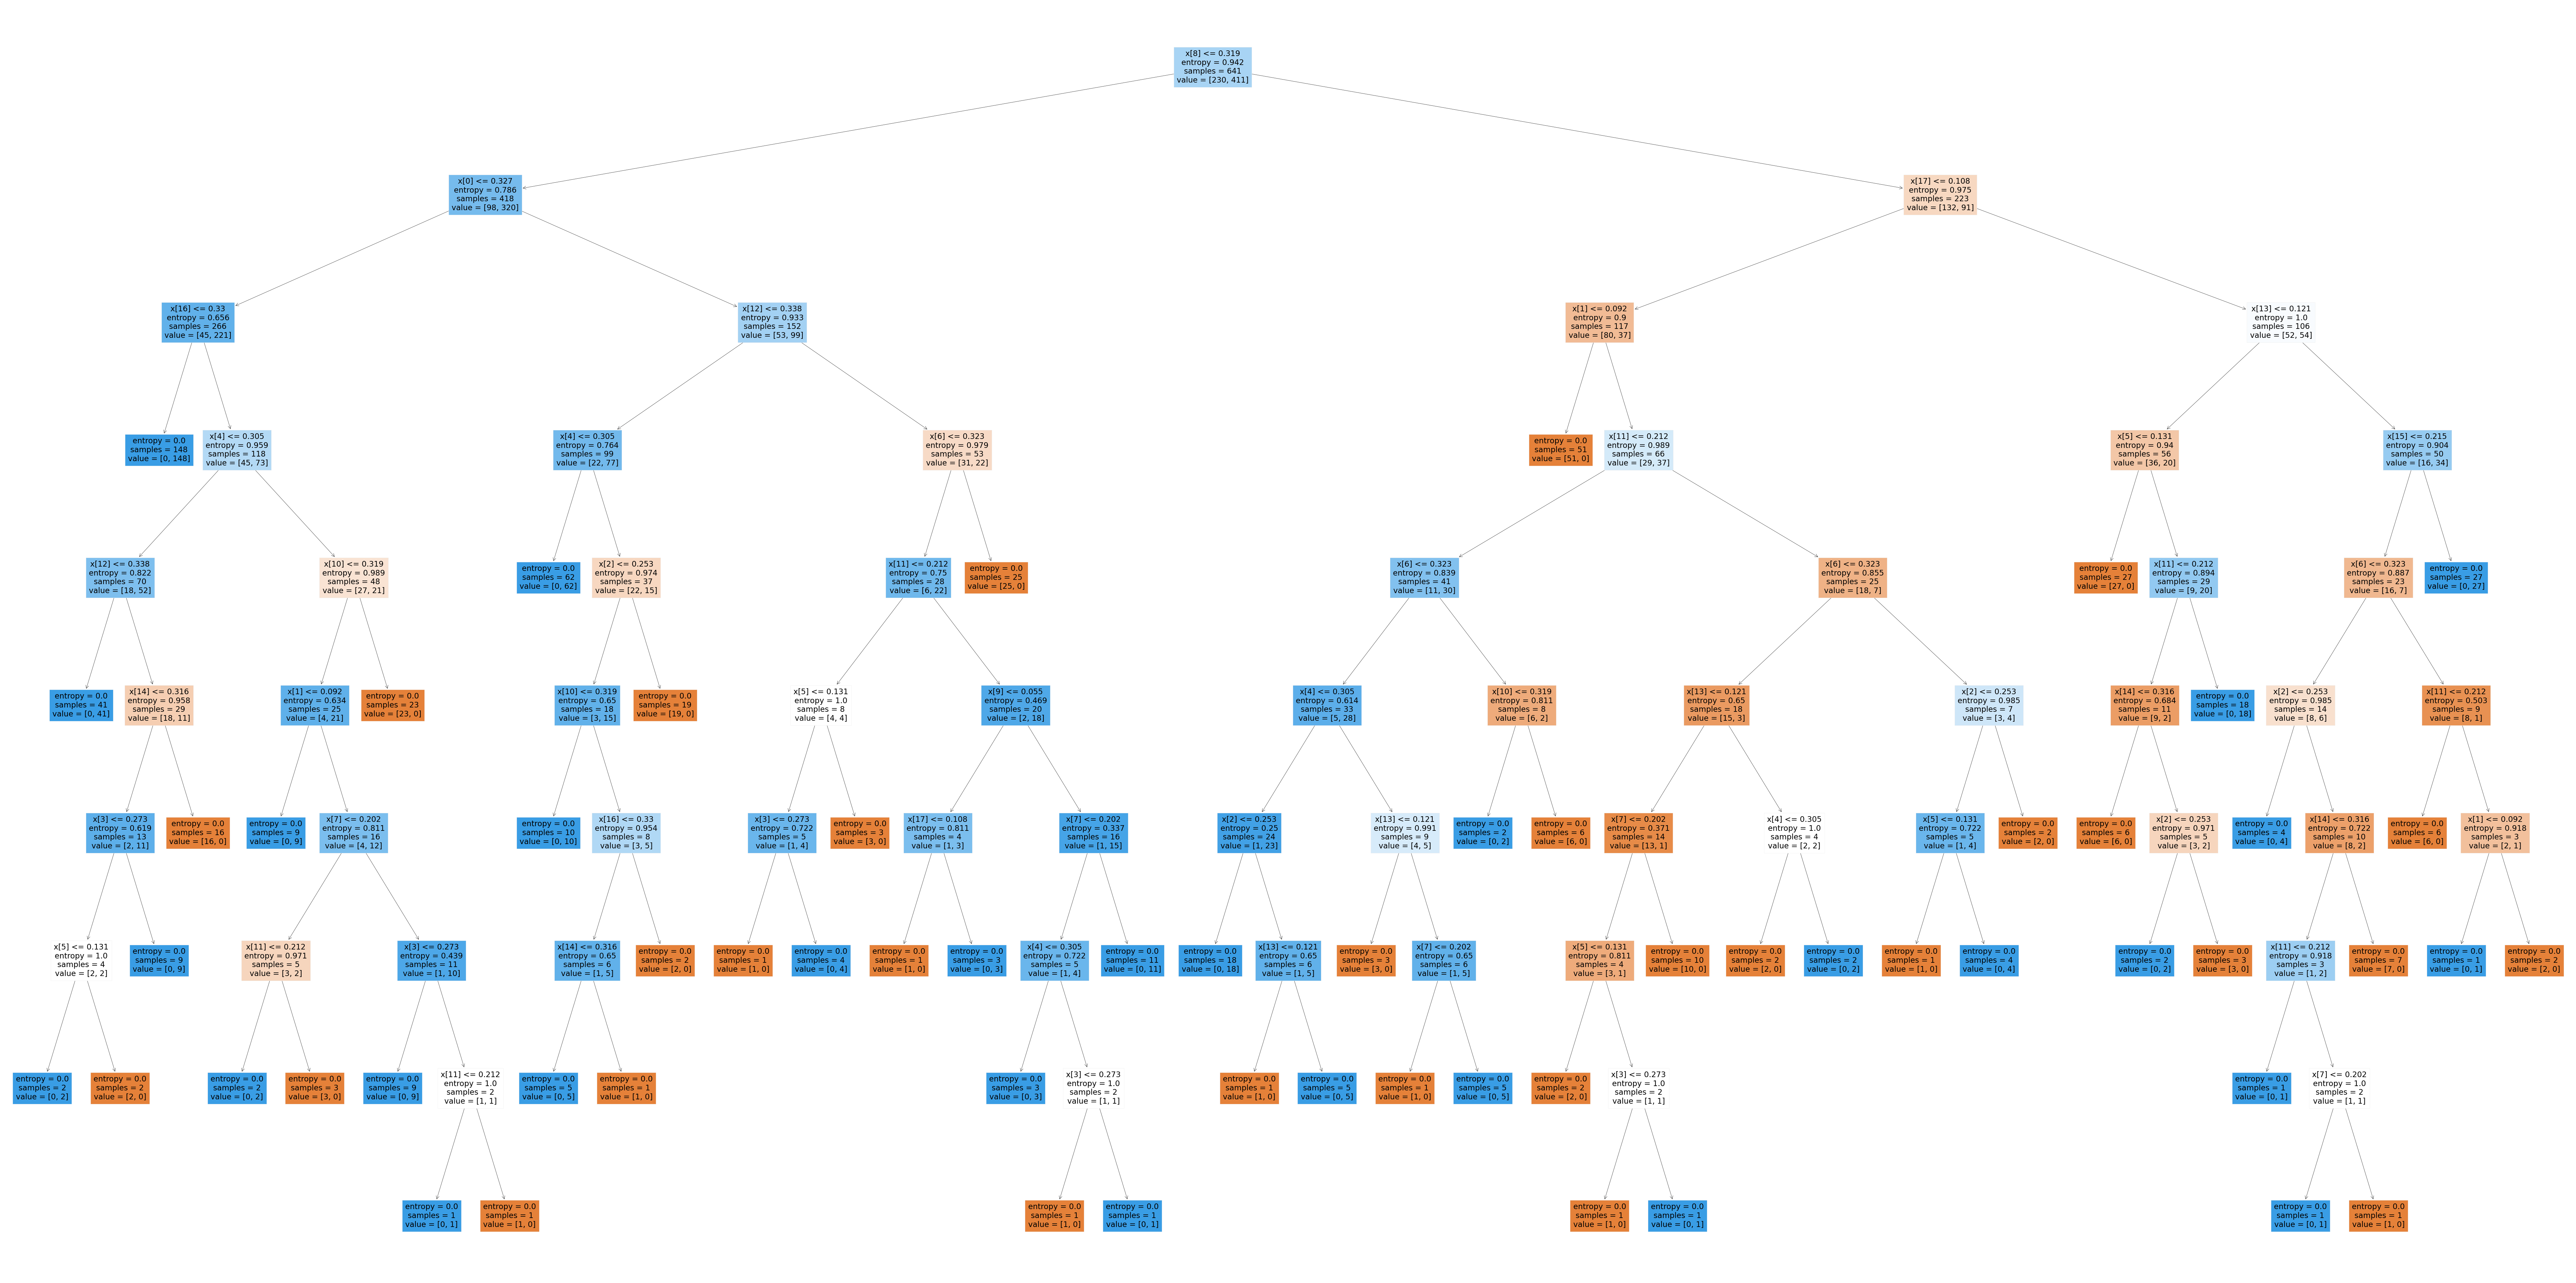

In [72]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(100,50))
tree.plot_tree(classifier,filled=True)
plt.show()


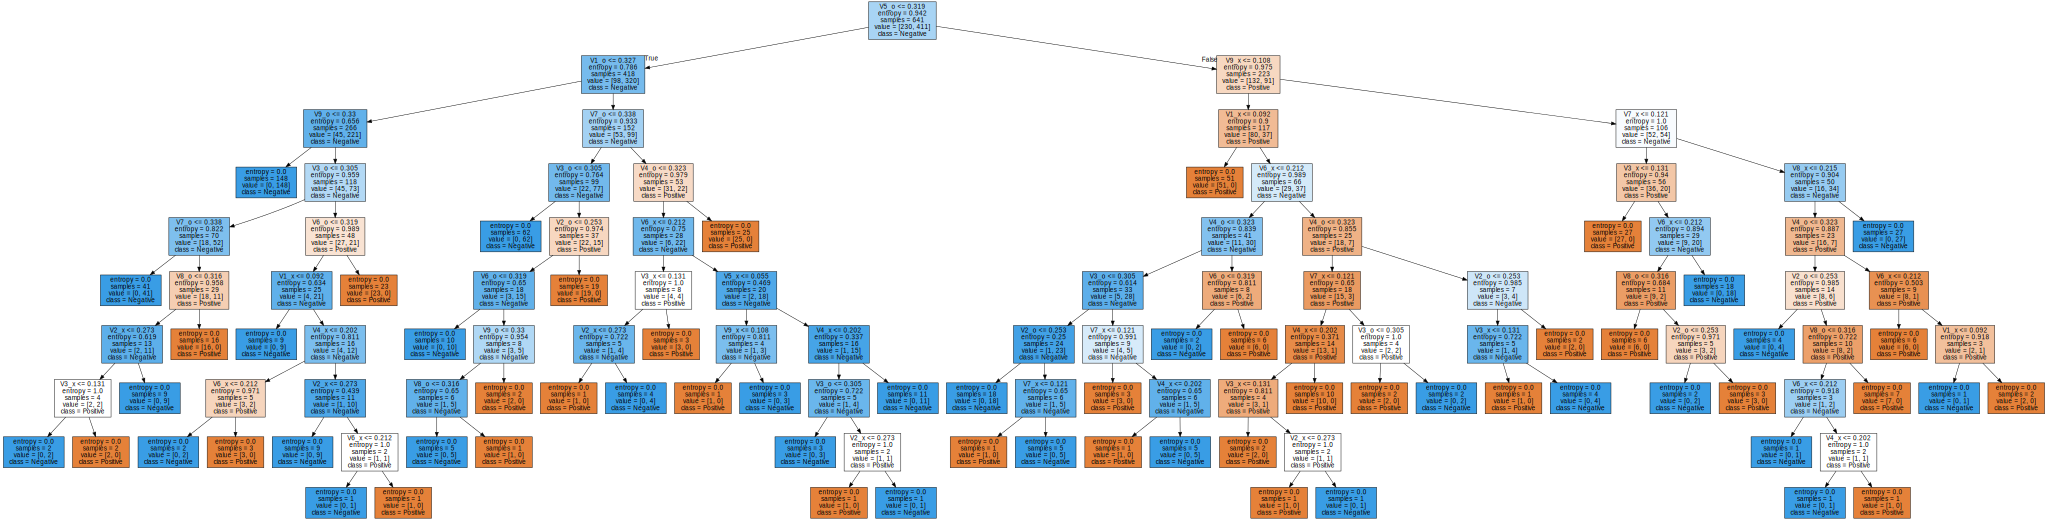

In [73]:
#A better visualization
import os
import graphviz

feature = ['V1_o', 'V1_x', 'V2_o', 'V2_x', 'V3_o', 'V3_x', 'V4_o', 'V4_x', 'V5_o','V5_x', 'V6_o', 'V6_x', 'V7_o', 'V7_x', 'V8_o', 'V8_x', 'V9_o', 'V9_x']
class_name = ['Positive','Negative']
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None,feature_names=feature,class_names=class_name,filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve
dec_tree = tree.DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)
pred = dec_tree.predict_proba(x_test)
roc_score = roc_auc_score(y_test,pred[:,1])
print("ROC SCORE: ", roc_score)
fpr, tpr, threshold = roc_curve(y_test,pred[:,1])
plt.clf()

ROC SCORE:  0.9450068399452805


<Figure size 640x480 with 0 Axes>

0.9499088007295942


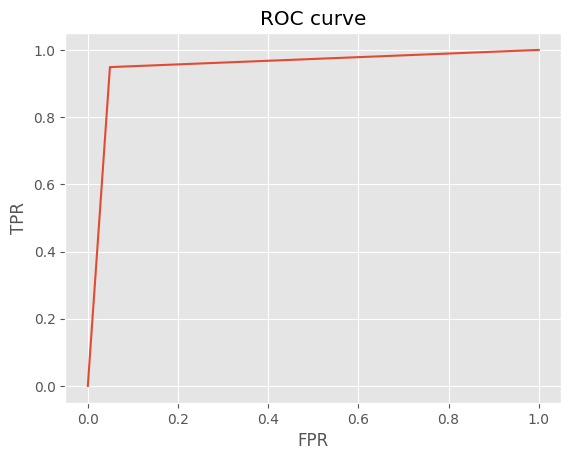

AUC =  0.9447560419516644


In [75]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)
predictions = dt.predict_proba(x_test)
print(roc_auc_score(y_test,predictions[:,1]))
fpr,tpr,_ = roc_curve(y_test,predictions[:,1])
plt.clf()
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()
print("AUC = ",roc_auc_score(y_test,y_pred))


In [76]:
import pickle
tictac = 'titac.sav'
pickle.dump(dt, open(tictac, 'wb'))

In [79]:
load_model = pickle.load(open(tictac, 'rb'))
y_pred = load_model.predict(x_test)
print('root mean squared error = ', metrics.roc_auc_score(y_test, y_pred))

root mean squared error =  0.9499088007295942
